# Setup

In [1]:
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
import matplotlib.transforms as transforms
import matplotlib.pyplot as plt

In [3]:
sns.set(rc={'figure.figsize':(24, 13.5)}, font_scale = 2.7)

In [4]:
#input args
out_dir = './out'
log_id = 1

#derived args
split_logs_dir = f'{out_dir}/split_logs/'

In [5]:
#access all 3 measurement axes
dim3 = lambda x : [x + '_' + s for s in ['x', 'y', 'z']]

# State preparation

In [6]:
state_log = pd.read_csv(f'{split_logs_dir}/state_transitions.csv', index_col = 0)
state_log.head()

,Timestamp,Log Entry Type,State,Time_s
Log Entry,,,,
9069,10000,STATE,IDLE,10.00
9081,10010,STATE,IDLE,10.01
9092,10020,STATE,IDLE,10.02
9103,10030,STATE,IDLE,10.03
9114,10040,STATE,IDLE,10.04


In [7]:
state_log.State.unique()

array(['IDLE'], dtype=object)

In [8]:
state_transitions = state_log.loc[state_log['State'].shift(1) != state_log['State']]

In [9]:
for state_transition in state_transitions.to_dict(orient = 'rows'):
    print(state_transition)

{'Timestamp': 10000, 'Log Entry Type': 'STATE', 'State': 'IDLE', 'Time_s': 10.0}


In [10]:
def plot_states(state_transitions):
    for state_transition in state_transitions.to_dict(orient = 'rows'):
        ax.axvline(state_transition['Time_s'], color='grey', linestyle='--')
        ax.text(state_transition['Time_s'], 0.1, state_transition['State'], fontsize=20, transform=ax.get_xaxis_transform(), rotation=90)

# IMU Plotting

In [26]:
imu_log = pd.read_csv(f'{split_logs_dir}/imu.csv', index_col = 0)
imu_log.head()

,Timestamp,Time_s,Log Entry Type,Sensor Board ID,Sensor Board Timestamp,Sensor Type,Acc_x,Acc_y,Acc_z,Gyro_x,Gyro_y,Gyro_z
Log Entry,,,,,,,,,,,,
11,810,0.81,SENSOR,1,0,IMU_1,0.0,0.0,0.0,0.0,0.0,0.0
12,810,0.81,SENSOR,1,0,IMU_2,0.0,0.0,0.0,0.0,0.0,0.0
14,810,0.81,SENSOR,2,0,IMU_1,0.0,0.0,0.0,0.0,0.0,0.0
15,810,0.81,SENSOR,2,0,IMU_2,0.0,0.0,0.0,0.0,0.0,0.0
17,810,0.81,SENSOR,3,0,IMU_1,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
#convert from wide to long format for plotting

imu_log.reset_index(inplace = True)
imu_log_long = pd.wide_to_long(imu_log, stubnames=['Acc', 'Gyro'], i = 'Log Entry', j='Axis', sep='_', suffix='\w')
imu_log_long['Axis'] = imu_log_long.index.get_level_values(1)
#sampling for faster drawing
imu_log_long = imu_log_long[::11]
#imu_log_long = 
imu_log_long.head()

,,Sensor Board Timestamp,Time_s,Sensor Board ID,Log Entry Type,Sensor Type,Timestamp,Acc,Gyro,Axis
Log Entry,Axis,,,,,,,,,
11,x,0,0.81,1,SENSOR,IMU_1,810,0.0,0.0,x
28,x,0,0.82,3,SENSOR,IMU_2,820,0.0,0.0,x
45,x,0,0.84,3,SENSOR,IMU_1,840,0.0,0.0,x
61,x,0,0.86,2,SENSOR,IMU_2,860,0.0,0.0,x
78,x,0,0.88,2,SENSOR,IMU_1,880,0.0,0.0,x


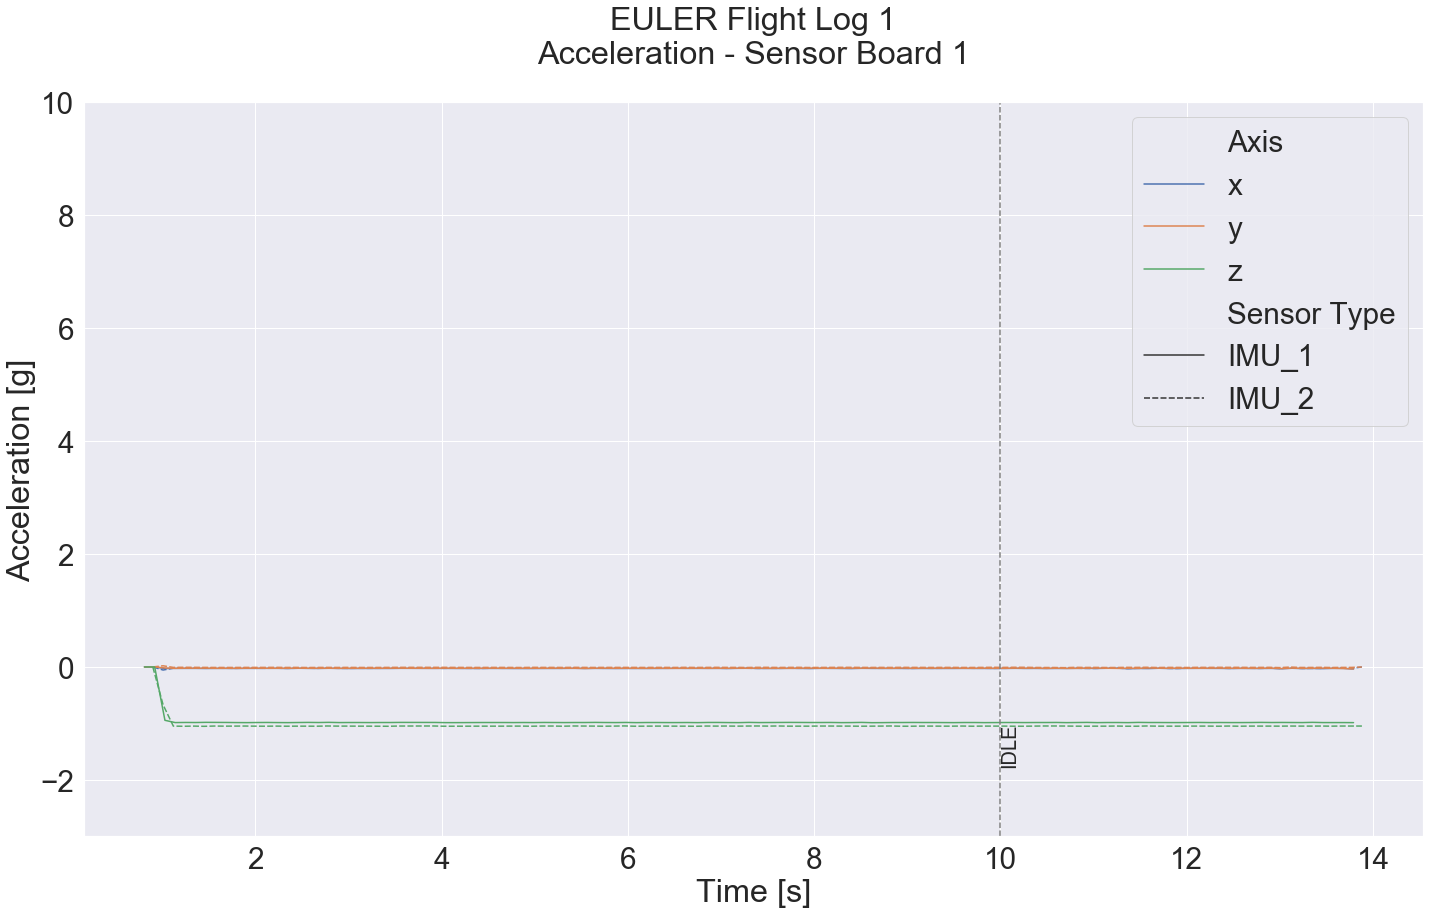

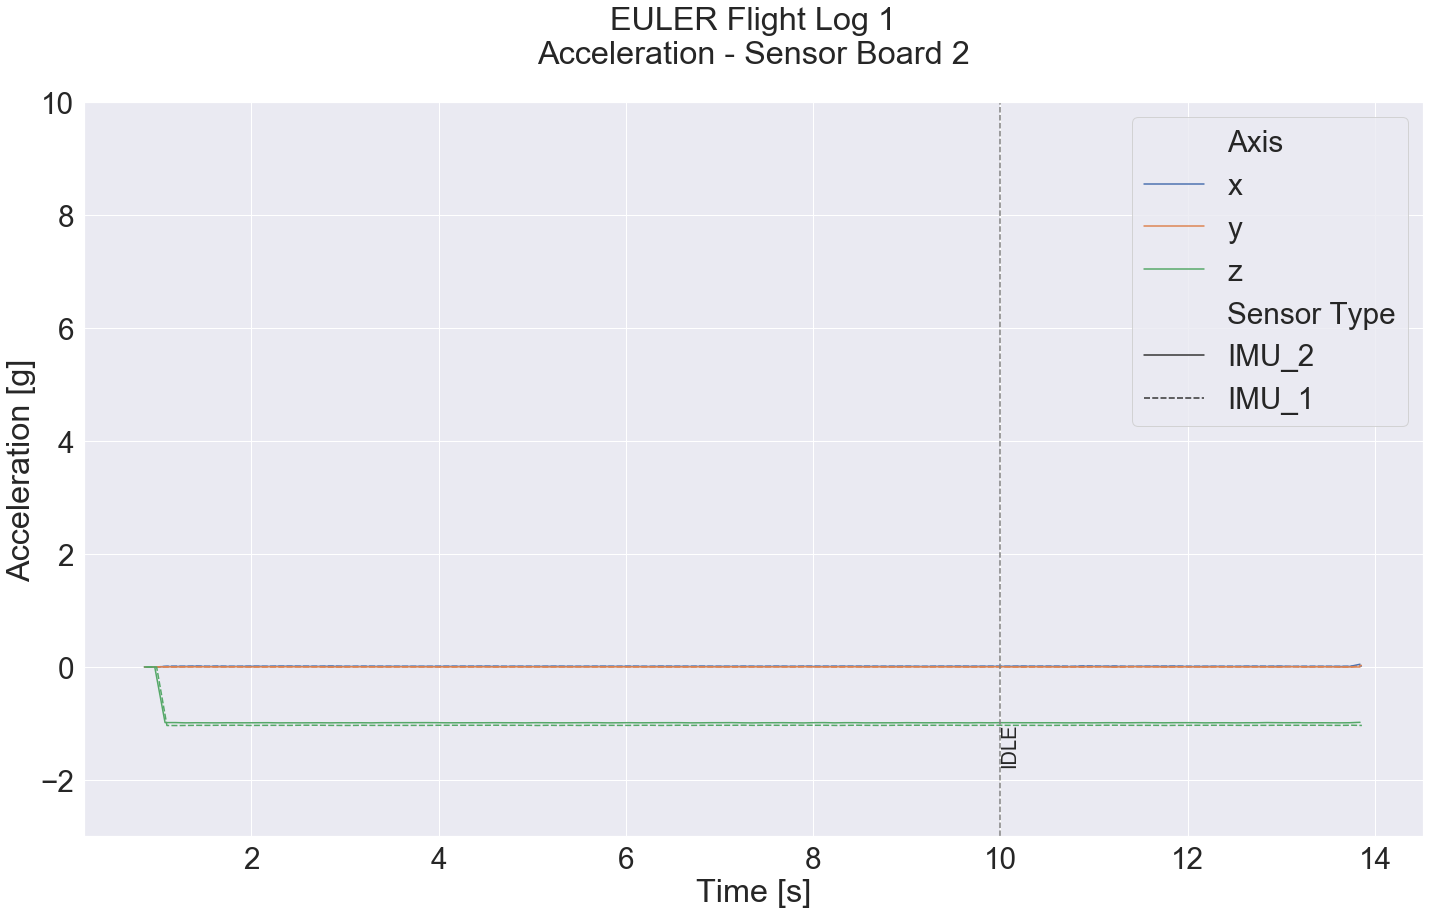

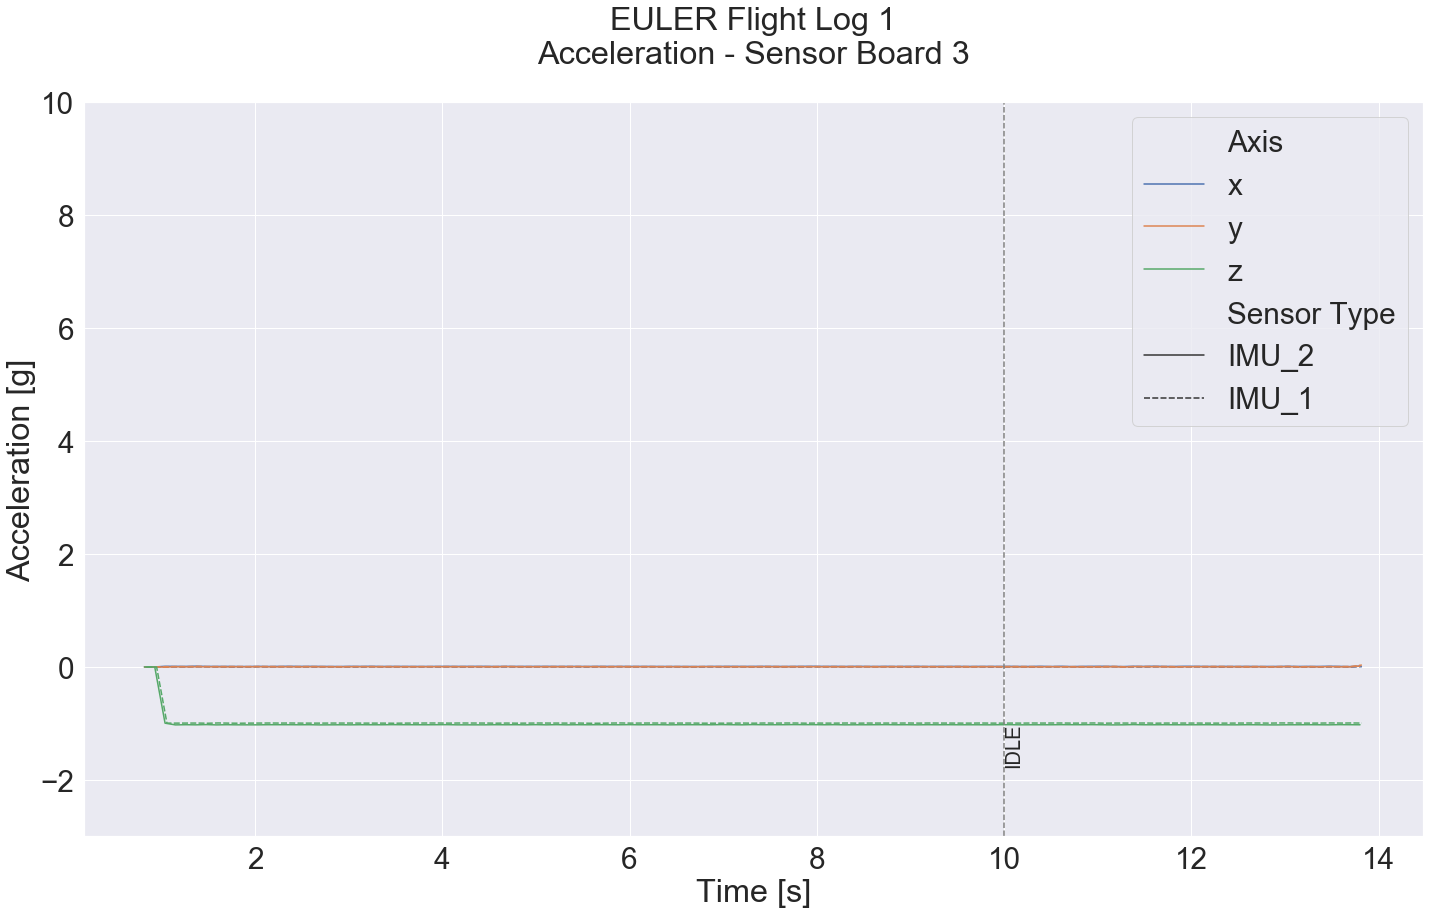

In [35]:
for sb_id in range(1, 4):
    ax = sns.lineplot(data = imu_log_long[imu_log_long['Sensor Board ID'] == sb_id], x = 'Time_s', y = 'Acc',
                      hue = 'Axis', style = 'Sensor Type')
    ax.set_title(f'EULER II Flight Log {log_id}\nAcceleration - Sensor Board {sb_id}\n')
    ax.set_ylabel('Acceleration [g]')
    ax.set_xlabel('Time [s]')
    ax.legend(loc="upper right")
    ax.set_ylim(-3, 10)
    plot_states(state_transitions)
    plt.show()

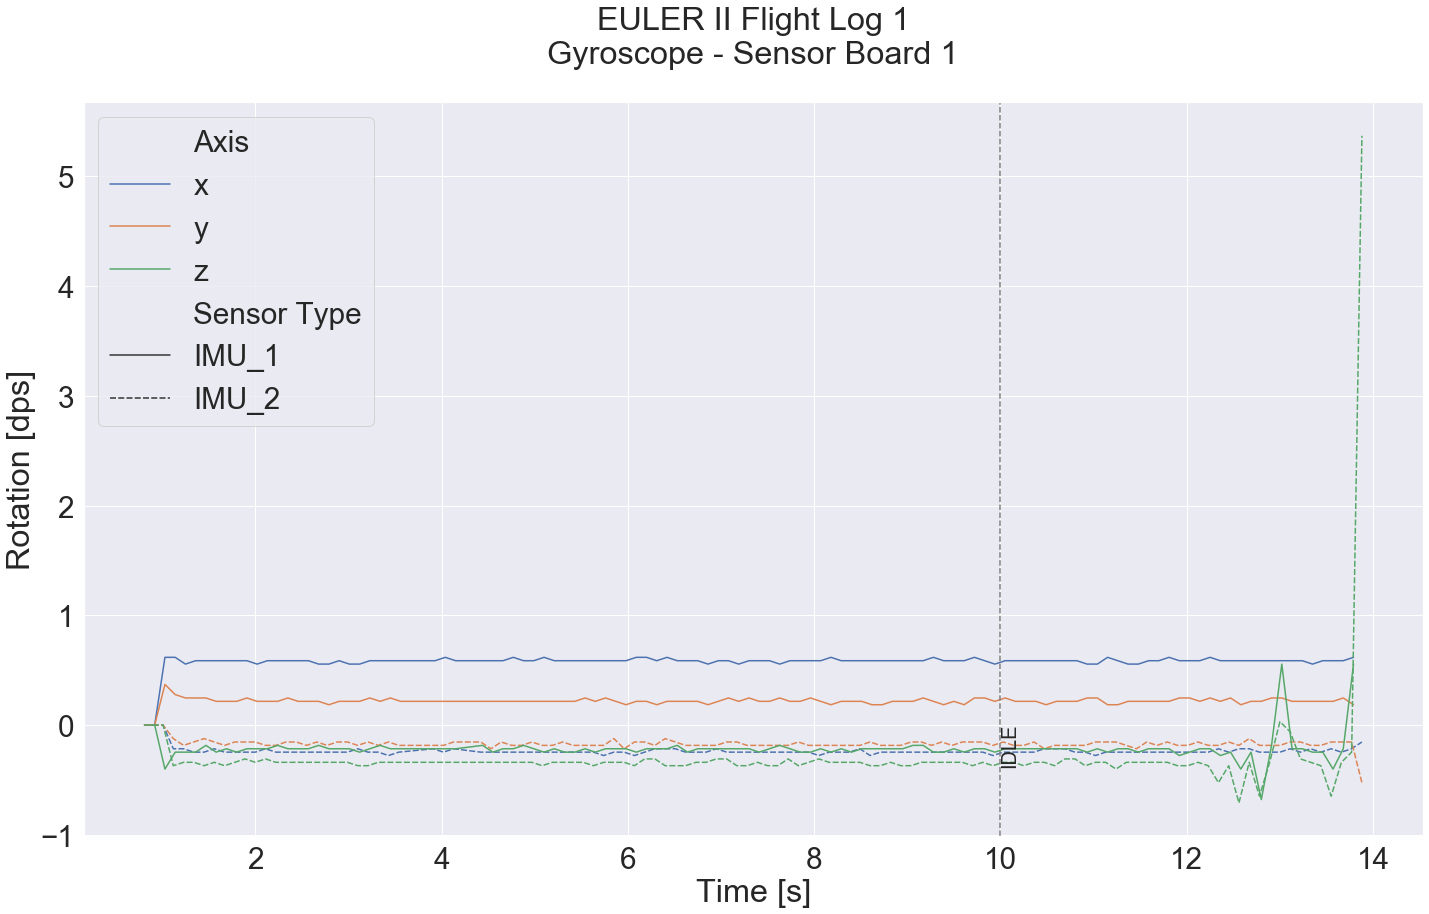

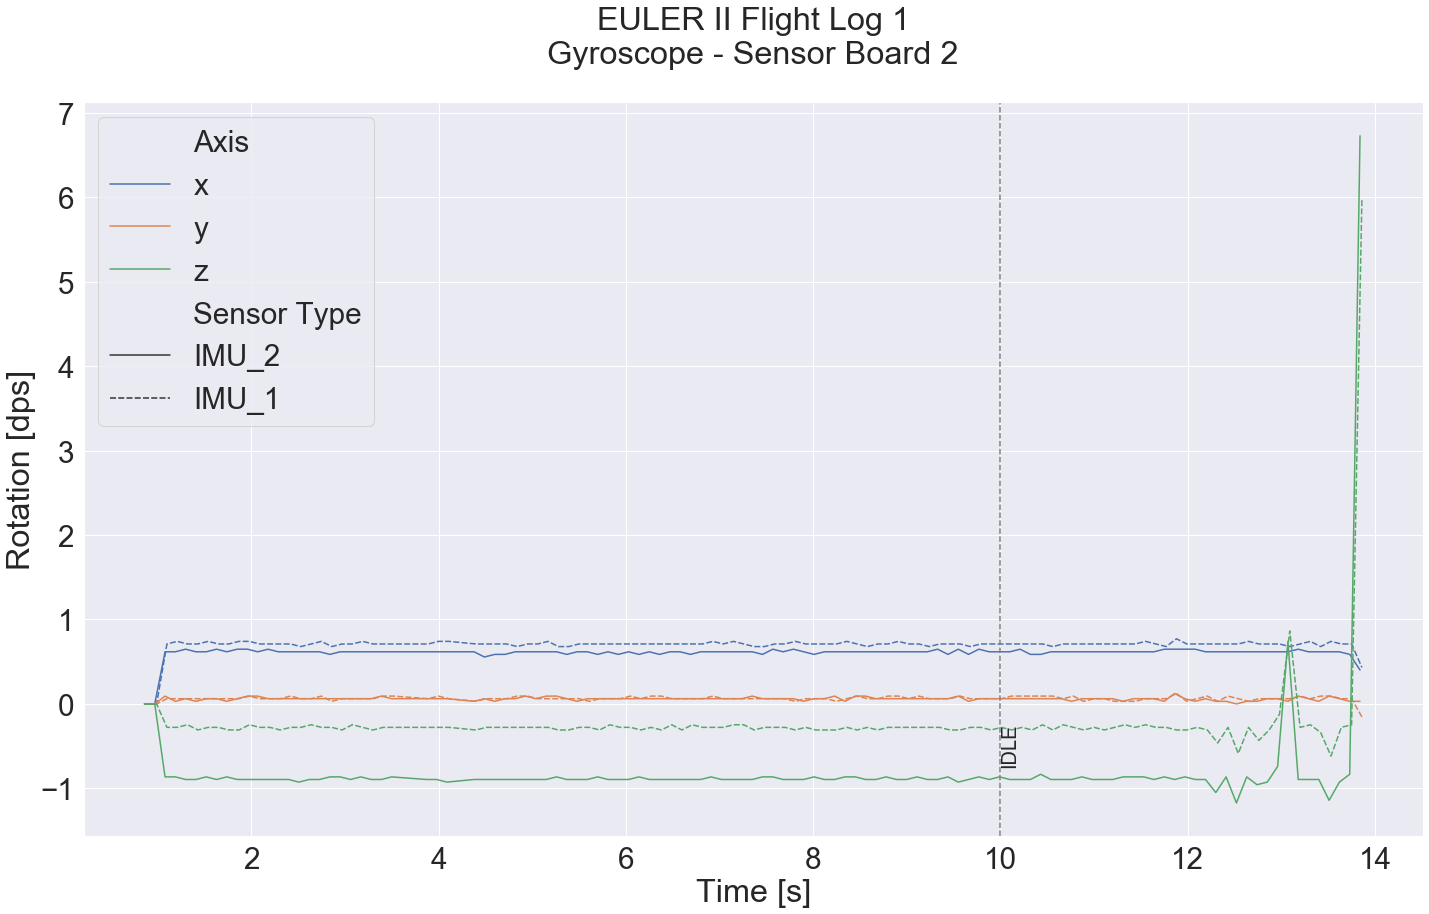

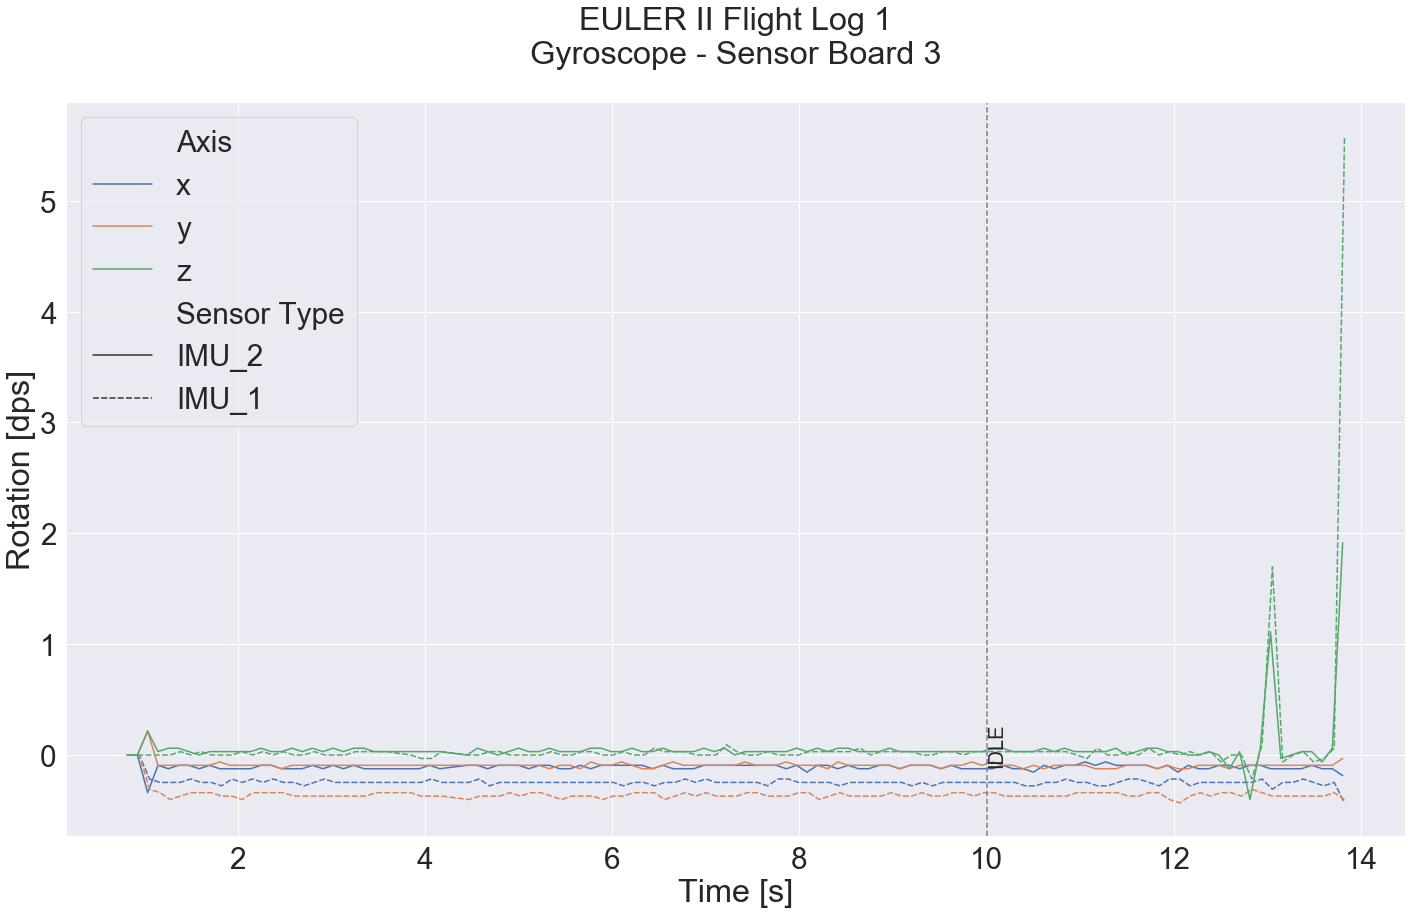

In [36]:
for sb_id in range(1, 4):
    ax = sns.lineplot(data = imu_log_long[imu_log_long['Sensor Board ID'] == sb_id], x = 'Time_s', y = 'Gyro',
                      hue = 'Axis', style = 'Sensor Type')
    ax.set_title(f'EULER II Flight Log {log_id}\nGyroscope - Sensor Board {sb_id}\n')
    ax.set_ylabel('Rotation [dps]')
    ax.set_xlabel('Time [s]')
    plot_states(state_transitions)
    plt.show()

# Baro + Temp Plotting

In [37]:
baro_log = pd.read_csv(f'{split_logs_dir}/baro.csv', index_col = 0)
#sampling for faster drawing
baro_log = baro_log[::10]
baro_log.head()
baro_log['Sensor Board ID'] = baro_log['Sensor Board ID'].apply(str).apply(lambda x: 'SB ' + x)

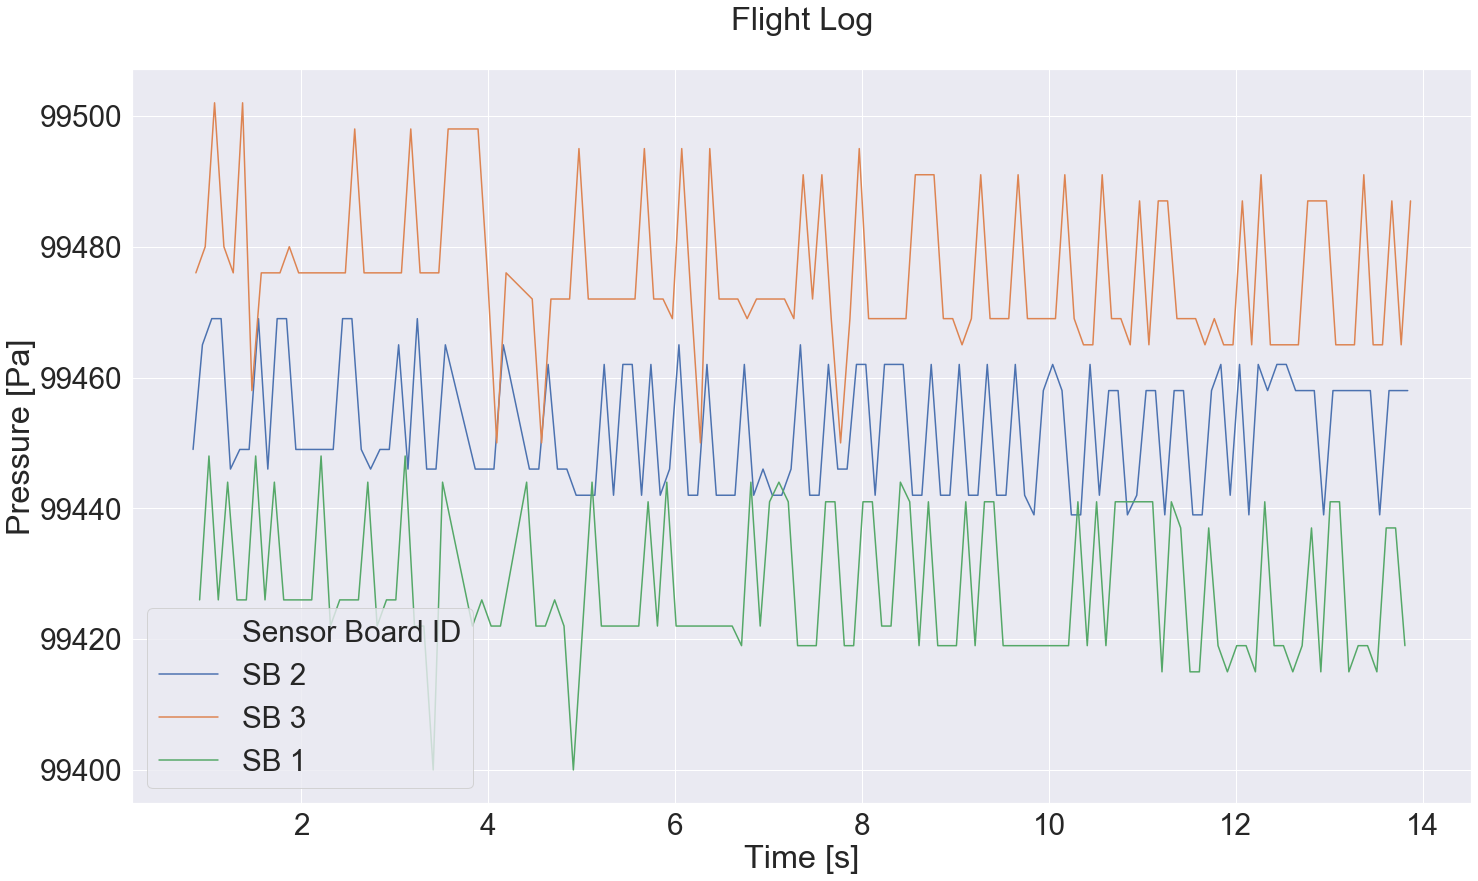

In [38]:
plt = sns.lineplot(data = baro_log[1:], x = 'Time_s', y = 'Pressure', hue = 'Sensor Board ID')
plt.set_title('Flight Log\n')
#plt.set_ylim(-3300, -3100)
plt.set_ylabel('Pressure [Pa]')
plt.set_xlabel('Time [s]')
plot_states(state_transitions)

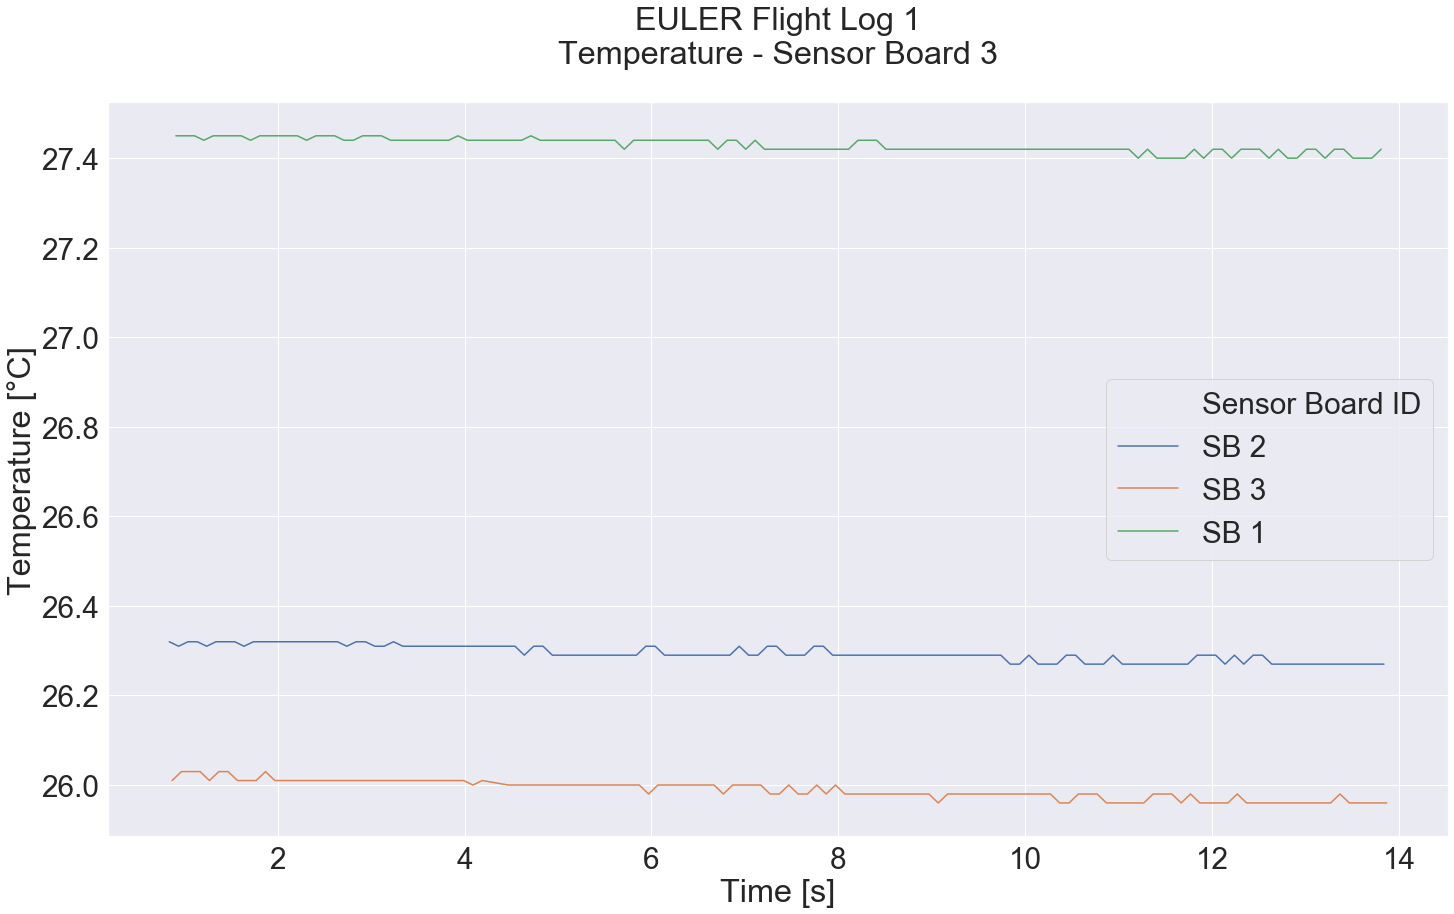

In [39]:
plt = sns.lineplot(data = baro_log[1:], x = 'Time_s', y = 'Temperature', hue = 'Sensor Board ID')
plt.set_title(f'EULER Flight Log {log_id}\nTemperature - Sensor Board 3\n')
plt.set_ylabel('Temperature [\N{DEGREE SIGN}C]')
plt.set_xlabel('Time [s]')
plot_states(state_transitions)
#plt.set_ylim(-3300, -3100)
#ylabels = ['{:,.1f}'.format(y) + '\N{DEGREE SIGN}C' for y in plt.get_yticks()]
#plt.set_yticklabels(ylabels)

## Battery Plotting

In [40]:
battery_log = pd.read_csv(f'{split_logs_dir}/battery.csv', index_col = 0)
#sampling for faster drawing
battery_log = battery_log[::10]
battery_log.head()

,Timestamp,Time_s,Log Entry Type,Sensor Board ID,Sensor Type,Battery,Consumption,Current,Supply
Log Entry,,,,,,,,,
0,500,0.50,SENSOR,4,BATTERY,213,0,2,65
1265,2040,2.04,SENSOR,4,BATTERY,10624,0,177,3257
3348,4480,4.48,SENSOR,4,BATTERY,10617,0,193,3247
5464,6520,6.52,SENSOR,4,BATTERY,10616,1,178,3257
7577,8560,8.56,SENSOR,4,BATTERY,10618,2,181,3259


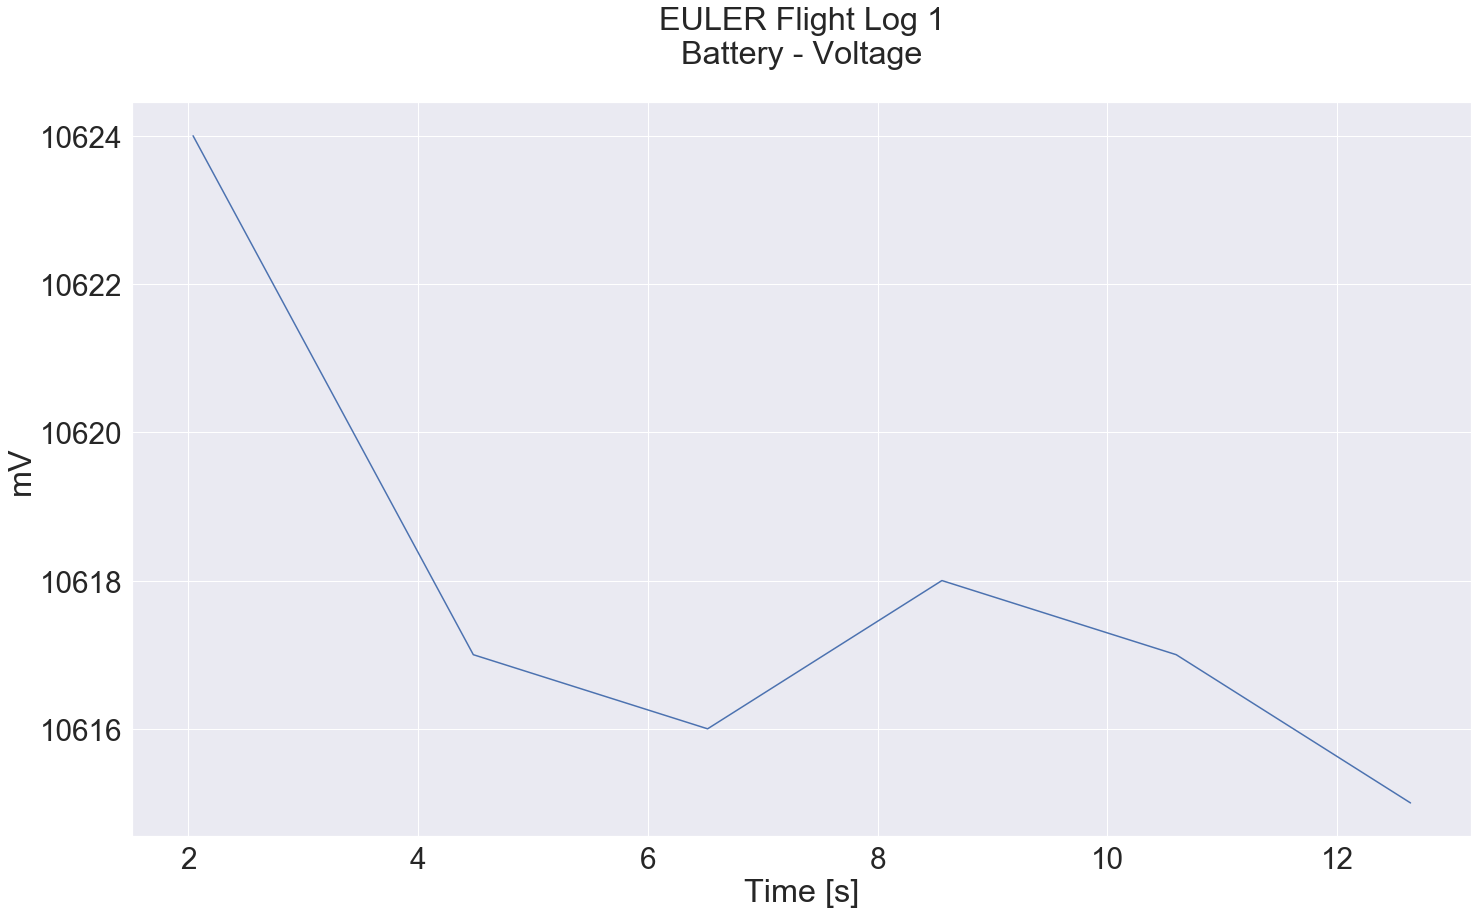

In [45]:
plt = sns.lineplot(data = battery_log[1:], x = 'Time_s', y = 'Battery')
plt.set_title(f'EULER Flight Log {log_id}\nBattery - Voltage\n')
plt.set_ylabel('mV')
plt.set_xlabel('Time [s]')
plot_states(state_transitions)

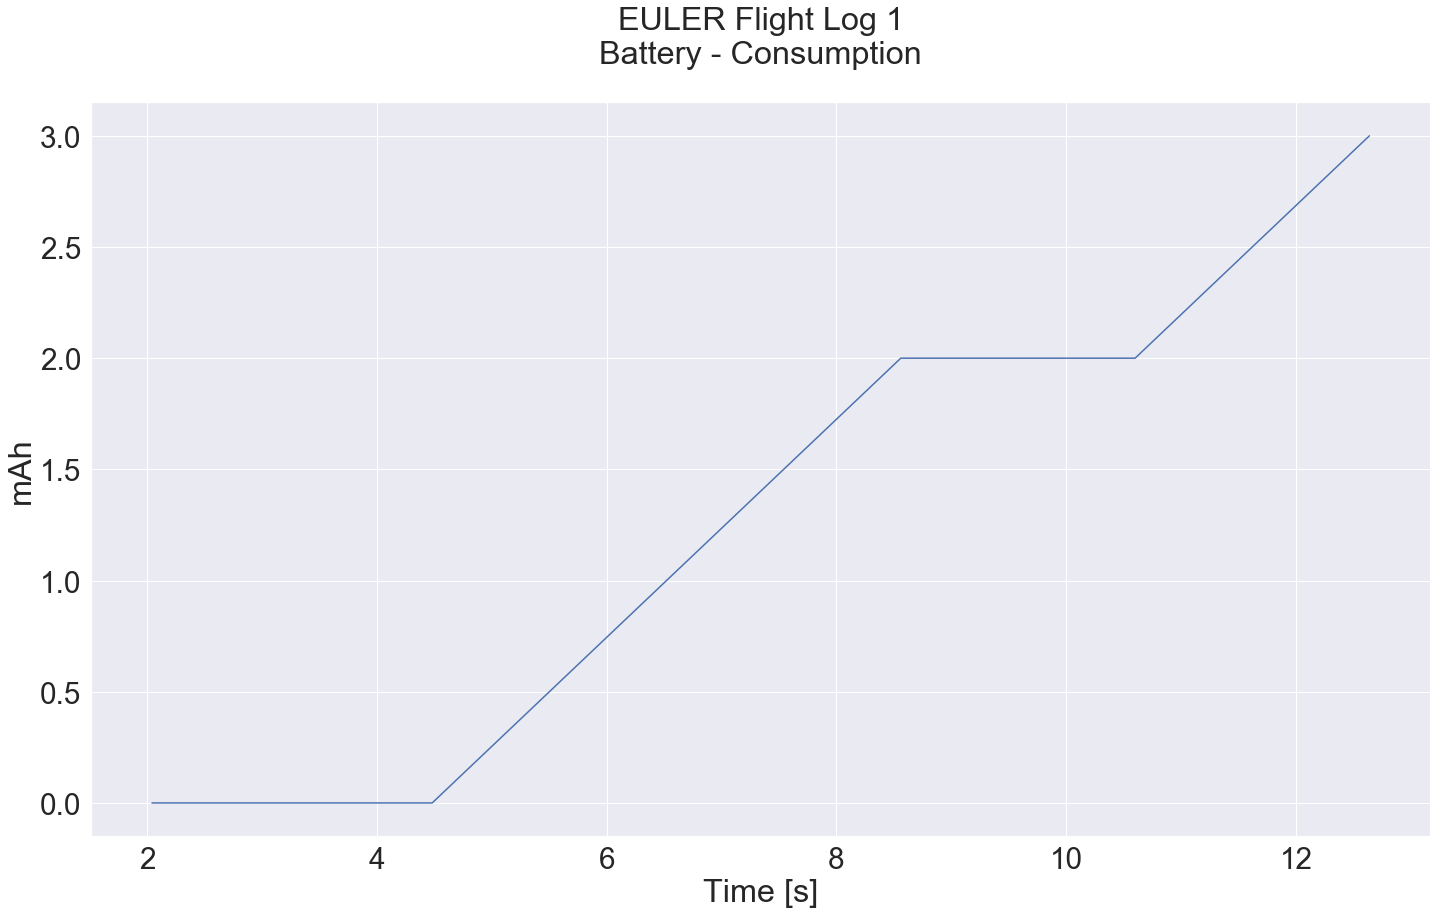

In [46]:
plt = sns.lineplot(data = battery_log[1:], x = 'Time_s', y = 'Consumption')
plt.set_title(f'EULER Flight Log {log_id}\nBattery - Consumption\n')
plt.set_ylabel('mAh')
plt.set_xlabel('Time [s]')
plot_states(state_transitions)

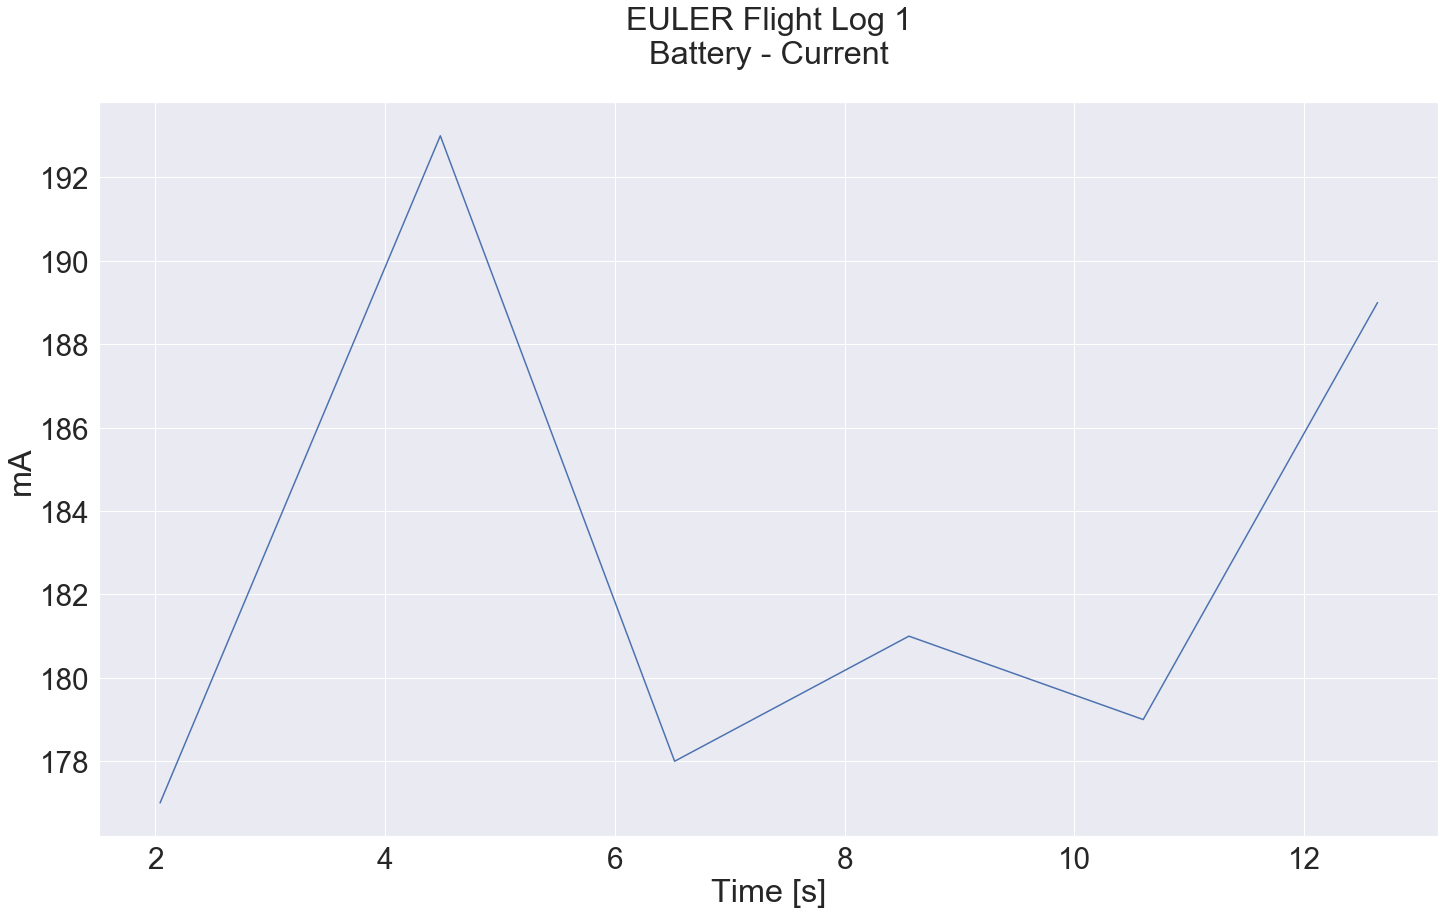

In [47]:
plt = sns.lineplot(data = battery_log[1:], x = 'Time_s', y = 'Current')
plt.set_title(f'EULER Flight Log {log_id}\nBattery - Current\n')
plt.set_ylabel('mA')
plt.set_xlabel('Time [s]')
plot_states(state_transitions)

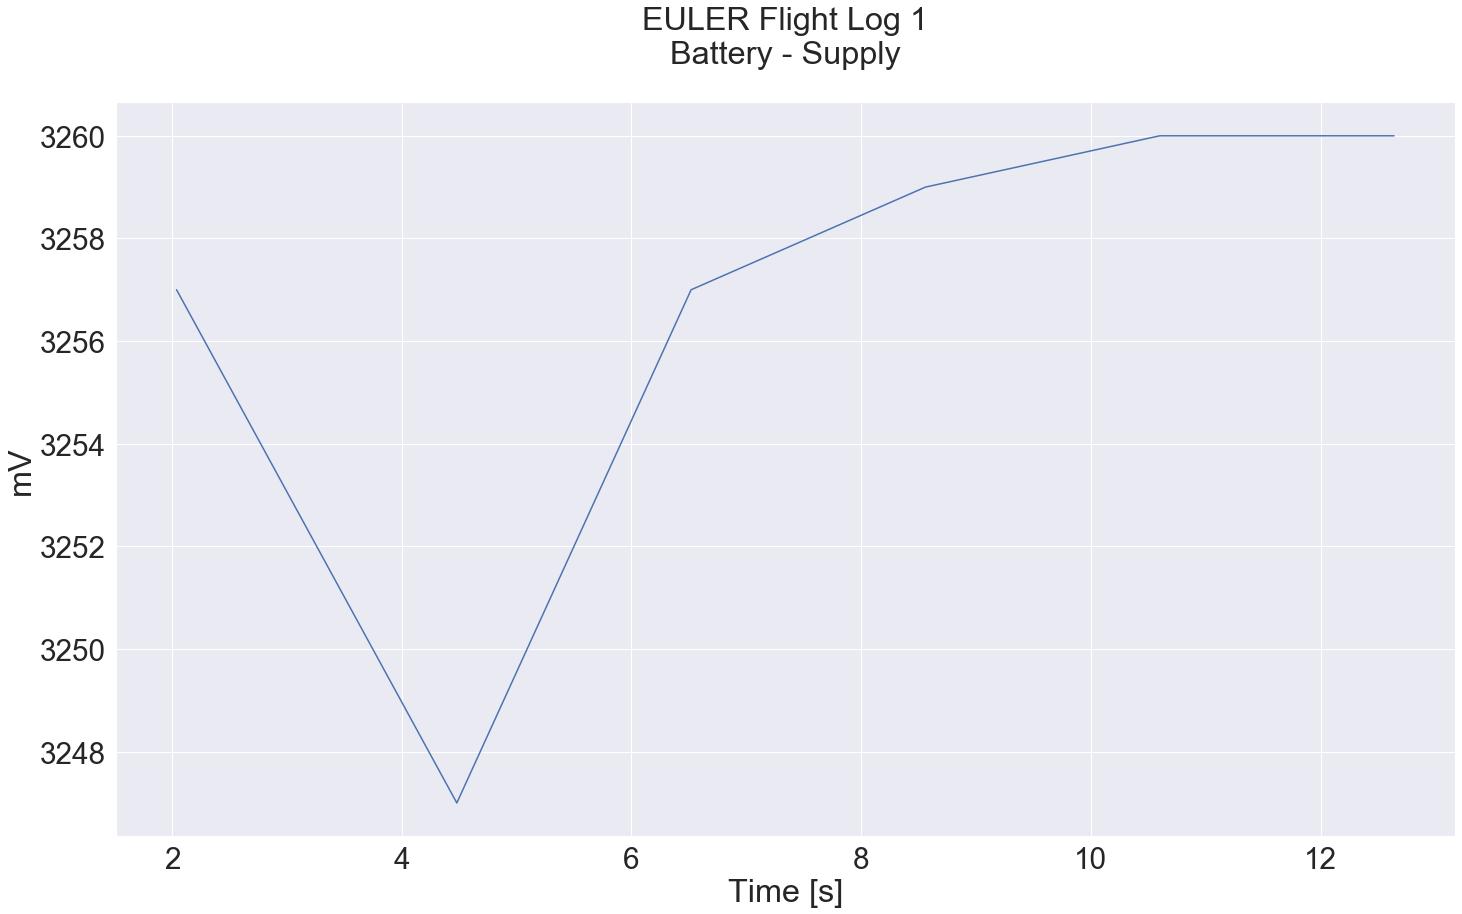

In [49]:
plt = sns.lineplot(data = battery_log[1:], x = 'Time_s', y = 'Supply')
plt.set_title(f'EULER Flight Log {log_id}\nBattery - Supply\n')
plt.set_ylabel('mV')
plt.set_xlabel('Time [s]')
plot_states(state_transitions)

## Estimator Vars Plotting

In [50]:
estimator_var_log = pd.read_csv(f'{split_logs_dir}/estimator_var.csv', index_col = 0)
#sampling for faster drawing
estimator_var_log = estimator_var_log[::10]
estimator_var_log.head()

,Timestamp,Time_s,Log Entry Type,World Position (z),Rocket Velocity (z),Rocket Acceleration (z)
Log Entry,,,,,,
110,900,0.9,ESTIMATOR_VAR,0.000,-0.098,-9.810
213,1000,1.0,ESTIMATOR_VAR,-0.055,-0.897,-2.185
314,1100,1.1,ESTIMATOR_VAR,-0.119,-0.731,0.127
414,1200,1.2,ESTIMATOR_VAR,-0.116,-0.380,0.134
515,1300,1.3,ESTIMATOR_VAR,0.061,0.385,0.127


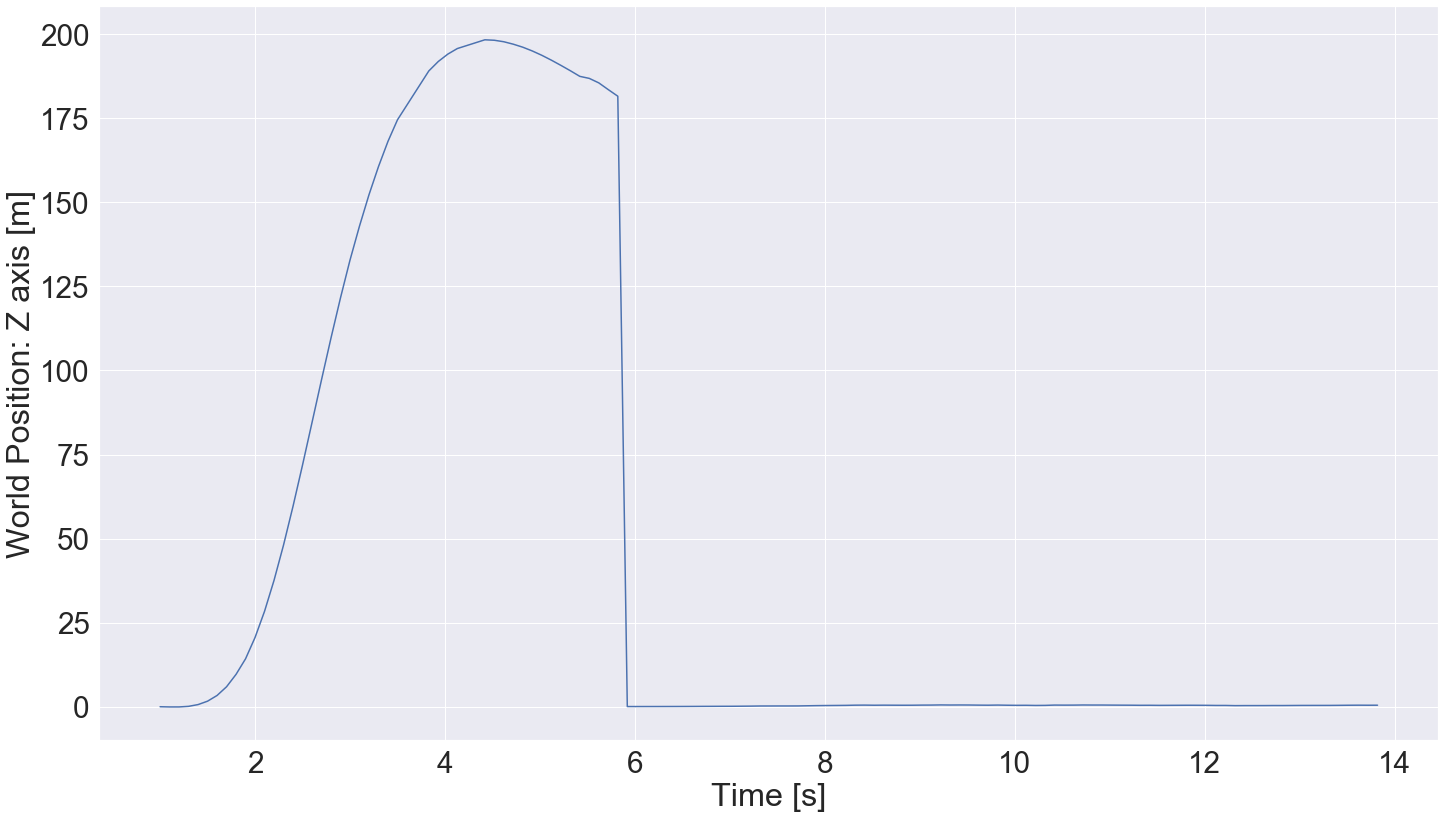

In [51]:
plt = sns.lineplot(data = estimator_var_log[1:], x = 'Time_s', y = 'World Position (z)')
plt.set_ylabel('World Position: Z axis [m]')
plt.set_xlabel('Time [s]')
plot_states(state_transitions)

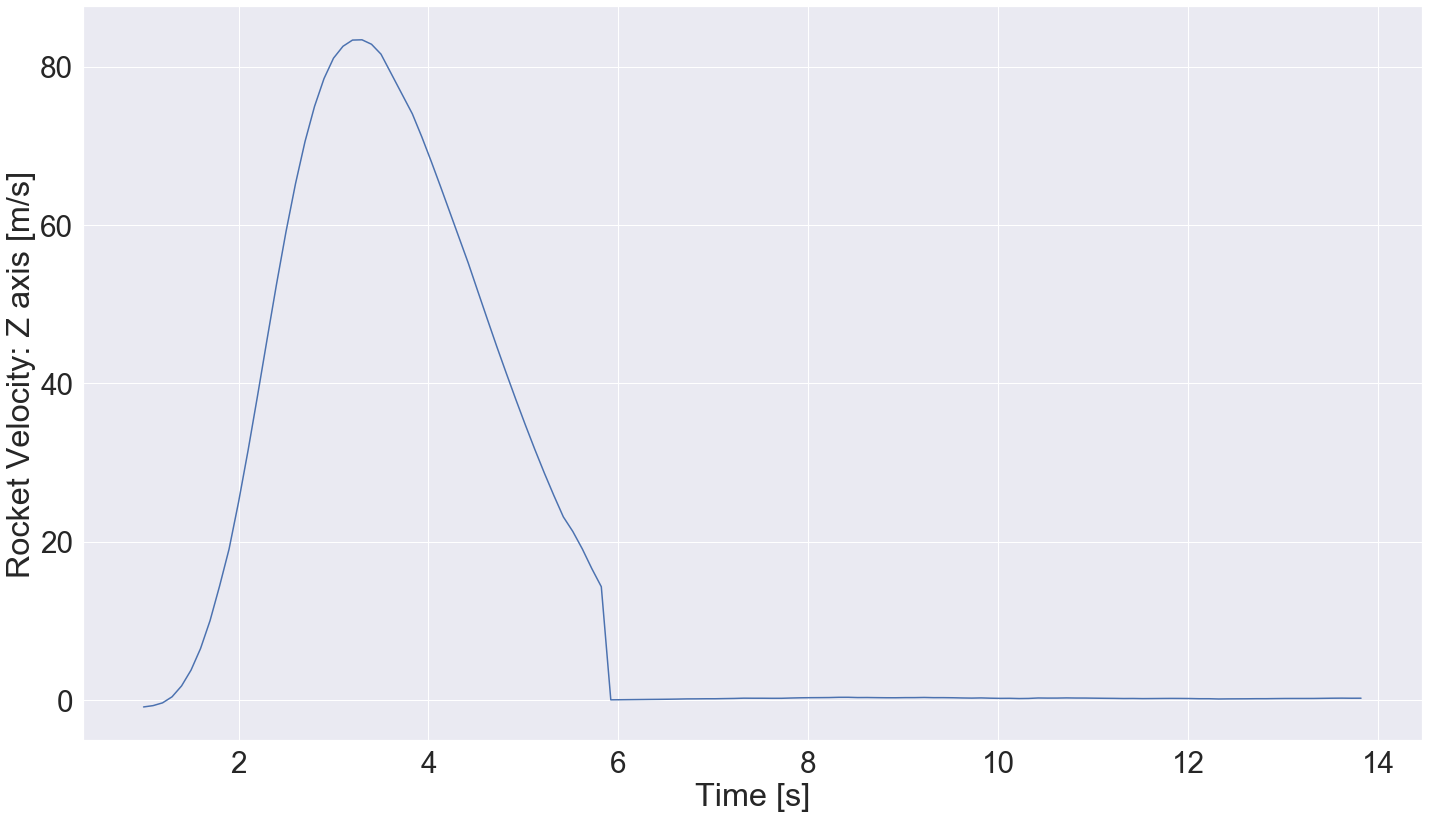

In [52]:
plt = sns.lineplot(data = estimator_var_log[1:], x = 'Time_s', y = 'Rocket Velocity (z)')
plt.set_ylabel('Rocket Velocity: Z axis [m/s]')
plt.set_xlabel('Time [s]')
plot_states(state_transitions)

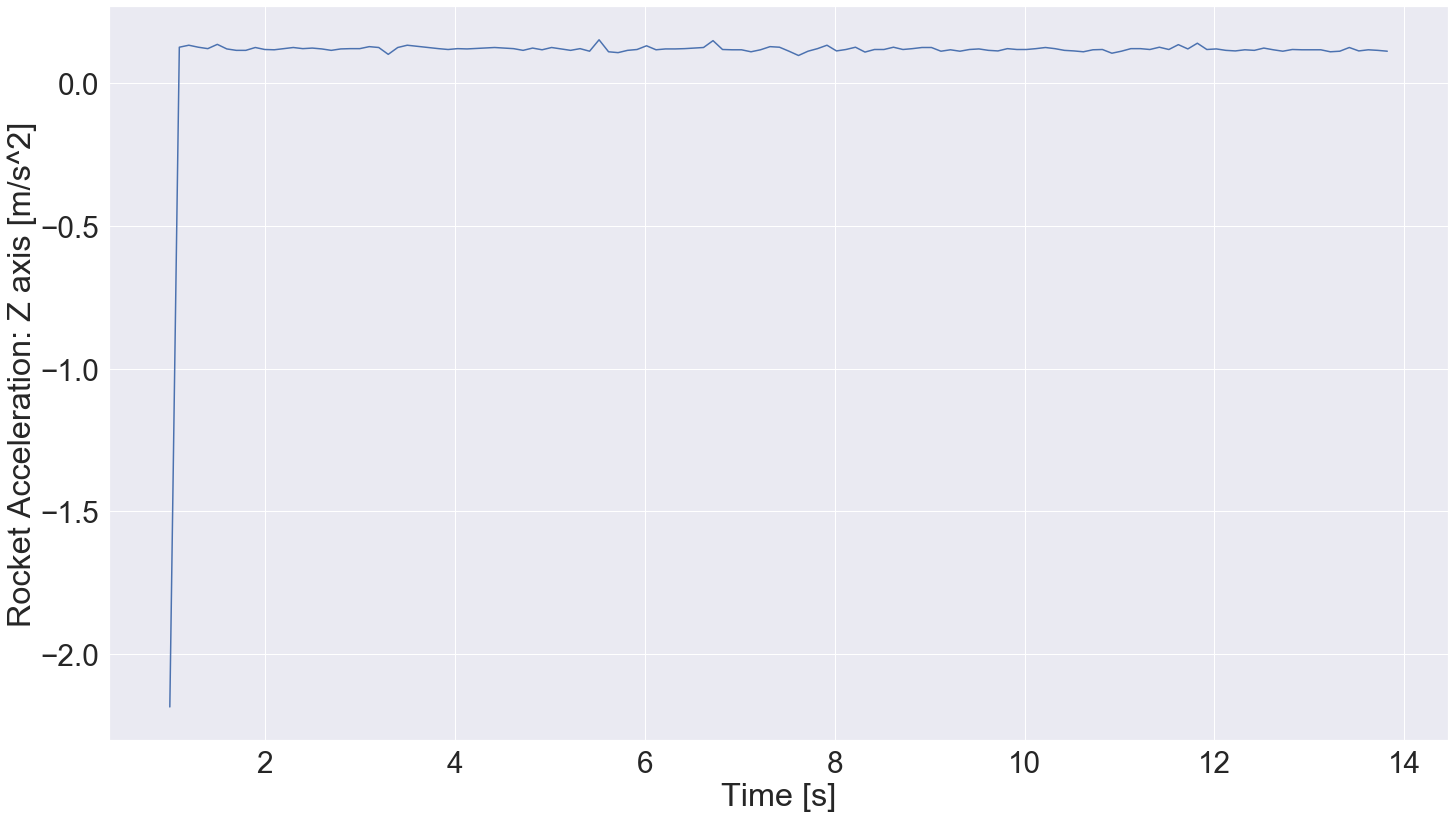

In [53]:
plt = sns.lineplot(data = estimator_var_log[1:], x = 'Time_s', y = 'Rocket Acceleration (z)')
plt.set_ylabel('Rocket Acceleration: Z axis [m/s^2]')
plt.set_xlabel('Time [s]')
plot_states(state_transitions)

In [54]:
controller_out_log = pd.read_csv(f'{split_logs_dir}/controller_out.csv', index_col = 0)
controller_out_log.head()

FileNotFoundError: [Errno 2] File ./out/split_logs//controller_out.csv does not exist: './out/split_logs//controller_out.csv'

In [121]:
controller_out_log['Controller Output'].unique()

array([0.])

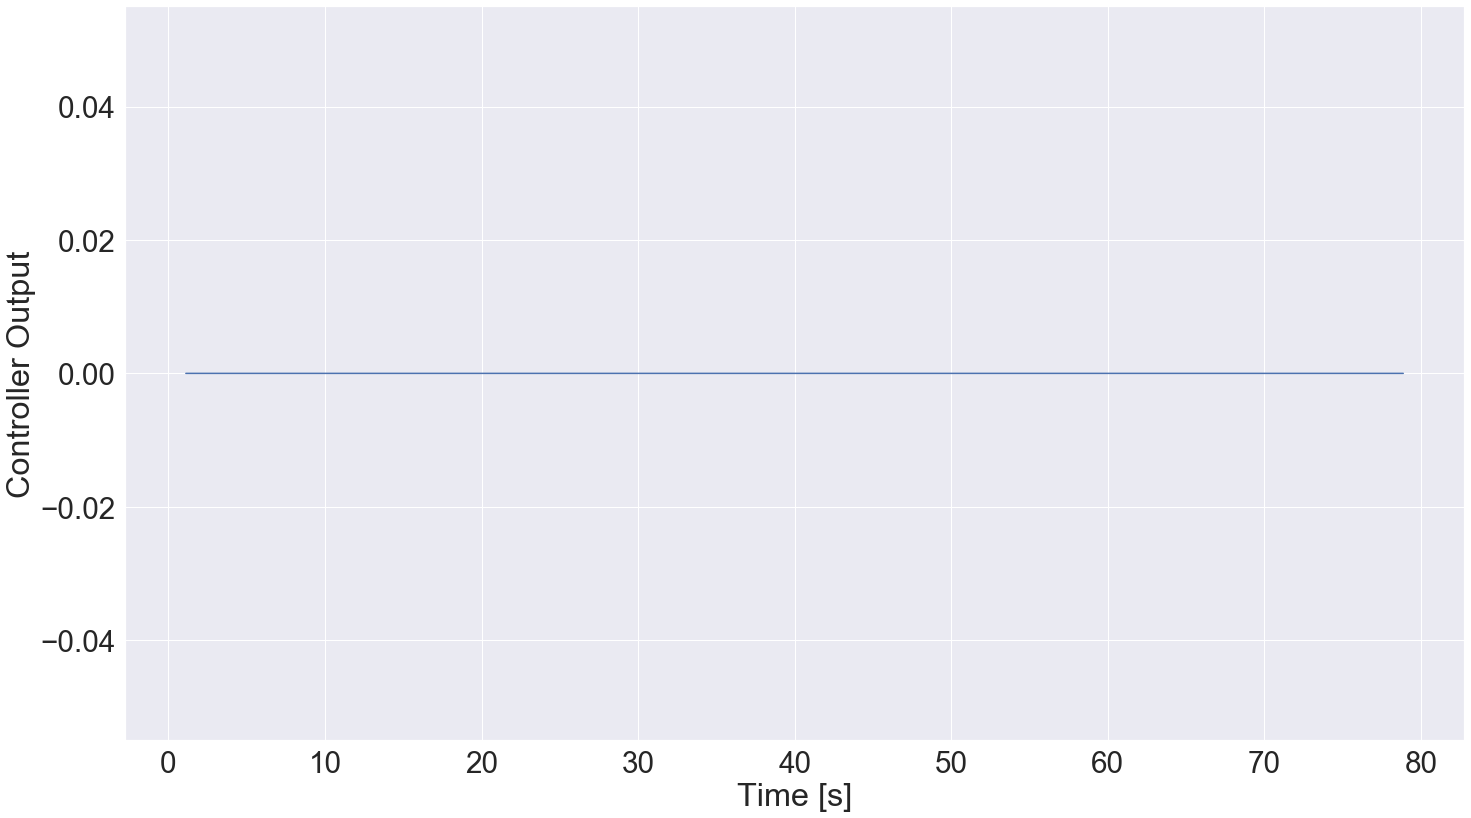

In [122]:
plt = sns.lineplot(data = controller_out_log[1:], x = 'Time_s', y = 'Controller Output')
plt.set_xlabel('Time [s]')
plot_states(state_transitions)

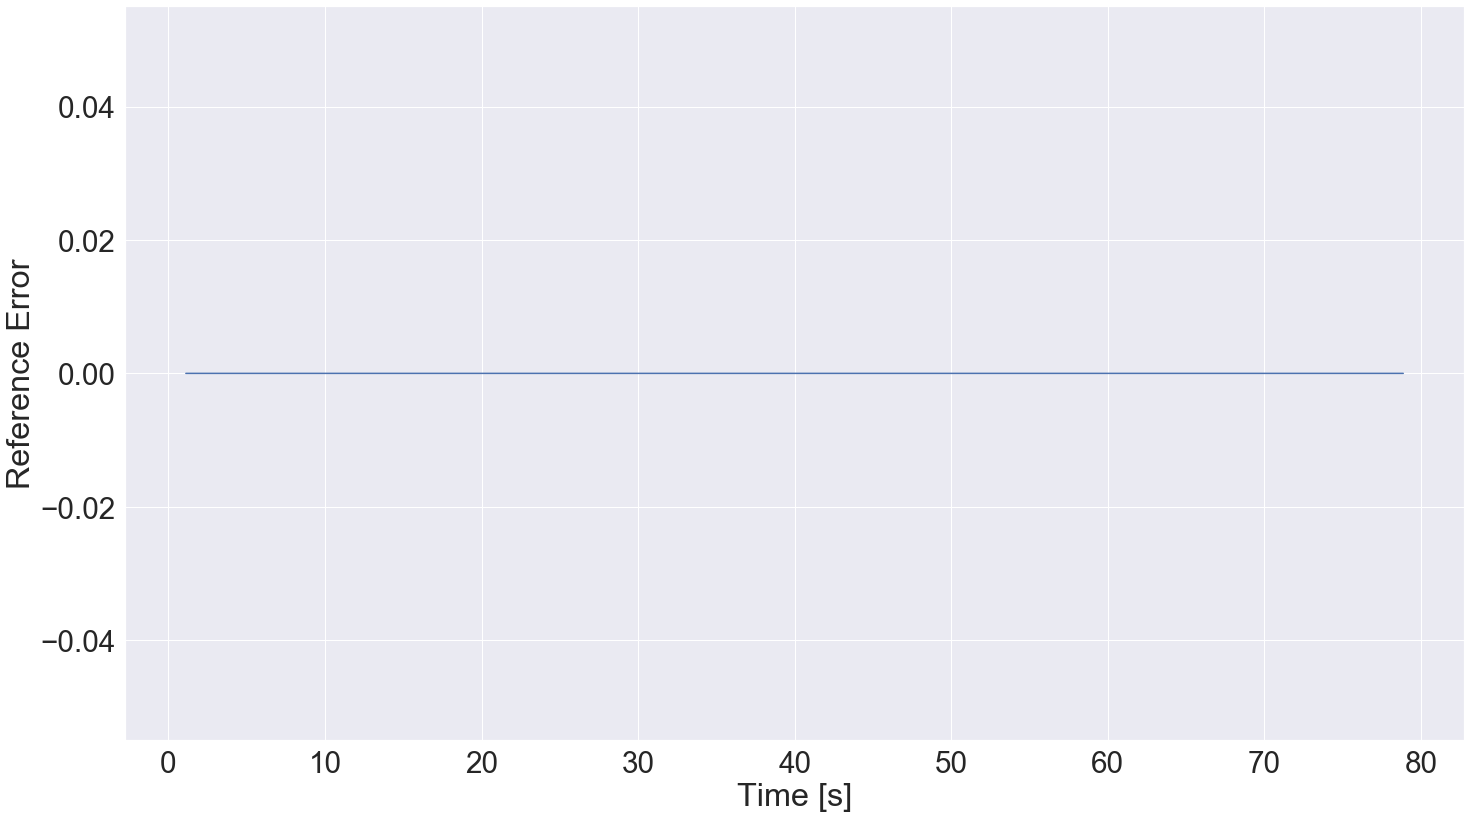

In [123]:
plt = sns.lineplot(data = controller_out_log[1:], x = 'Time_s', y = 'Reference Error')
plt.set_xlabel('Time [s]')
plot_states(state_transitions)

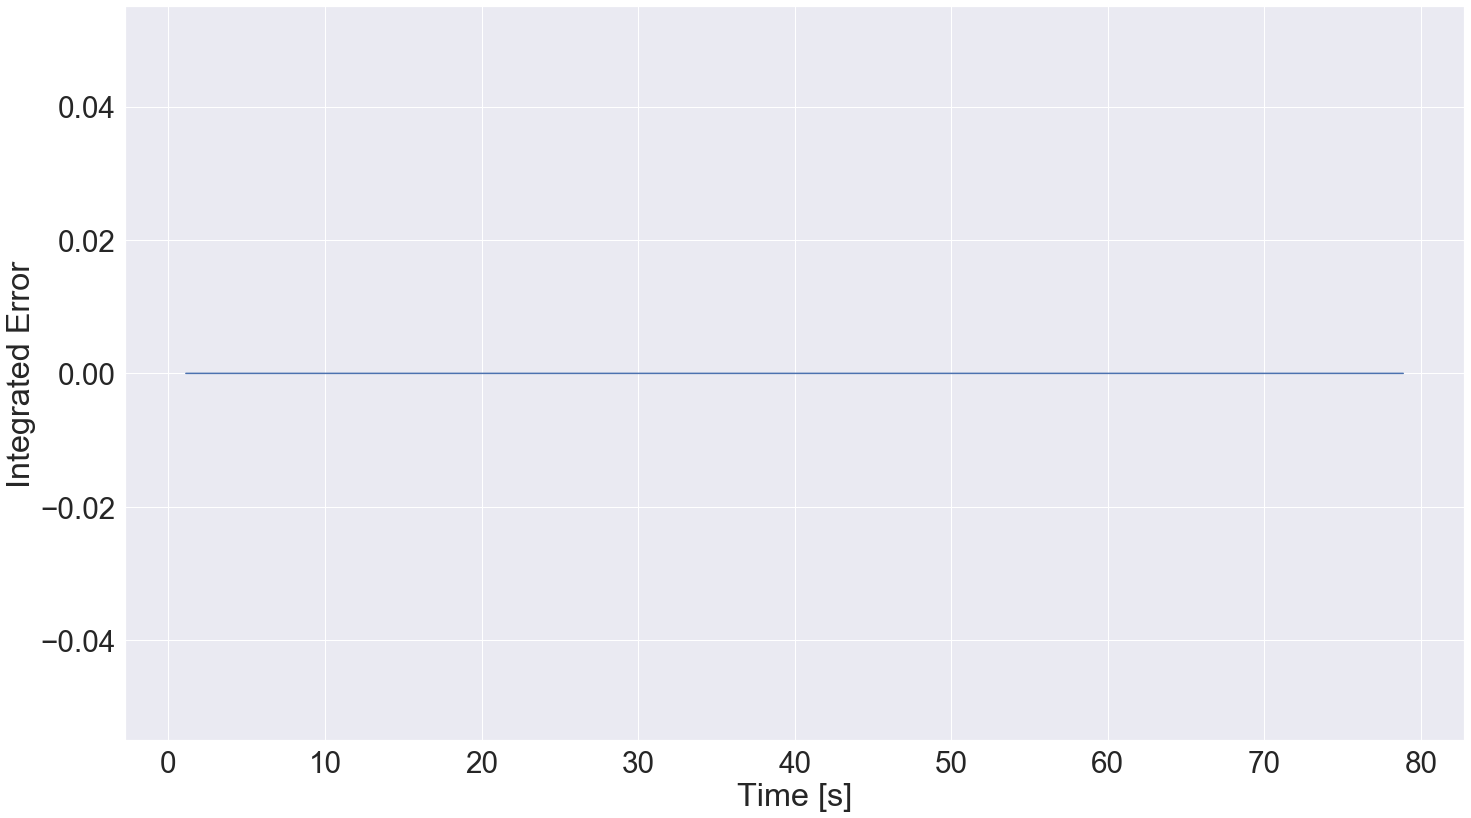

In [124]:
plt = sns.lineplot(data = controller_out_log[1:], x = 'Time_s', y = 'Integrated Error')
plt.set_xlabel('Time [s]')
plot_states(state_transitions)